In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from influence_moo.env.mission import Mission
from influence_moo.plotting import plot_mission, plot_rollout
from influence_moo.env.env import OceanEnv

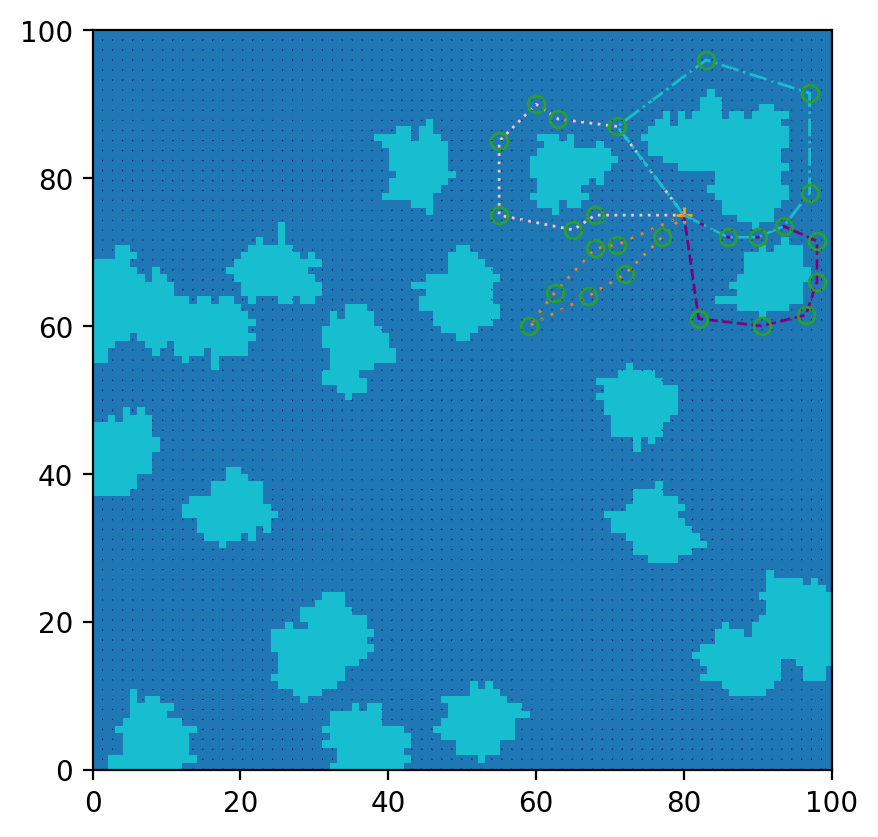

In [2]:
"""Load up the mission so we can see what the plan is"""
mission_dir = Path(os.getcwd()).parent / "missions" / "alpha"
mission = Mission(mission_dir)
fig, ax = plt.subplots(1,1,dpi=200)
plot_mission(mission,ax)

In [3]:
"""Set up an environment and see what happens with a random ASV policy"""
env = OceanEnv(mission, dt=0.1, num_asvs=1)
env.run(num_iterations=1000)

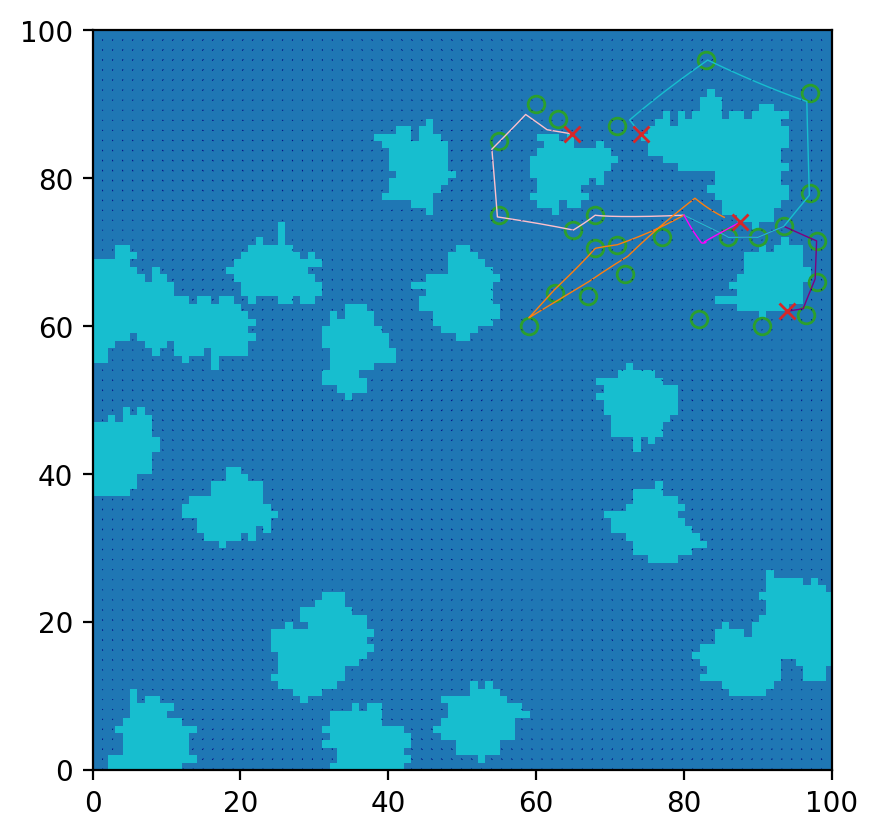

In [4]:
fig, ax = plt.subplots(1,1,dpi=200)
plot_rollout(env)